## Statistics: Summary Measures

In [1]:
%matplotlib inline

In [2]:
from nose.tools import assert_equal
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.testing import assert_almost_equal, assert_array_equal

### Problem 1

In [36]:
def make_hists(df, col1, col2):
    '''
    Makes two histograms for columns of a dataframe, namely the lat and 
    long columns of the airports data
    
    Params
    -------
    df: the dataframe to plot
    col1: the first column to plot
    col2: the second column to plot
    
    Returns
    -------
    A tuple of two matplotlib.axes._subplots.AxesSubplot objects
    
    '''
    
    f, (ax1,ax2) = plt.subplots(nrows=2,figsize=(12.0, 9.0))
    df[col1].plot(kind='hist',xlim=(10,70),edgecolor='black',color='blue',legend=True,ax=ax1)
    df[col2].plot(kind='hist',xlim=(-180, -40),edgecolor='black',color='blue',legend=True,ax=ax2)
    return ax1,ax2

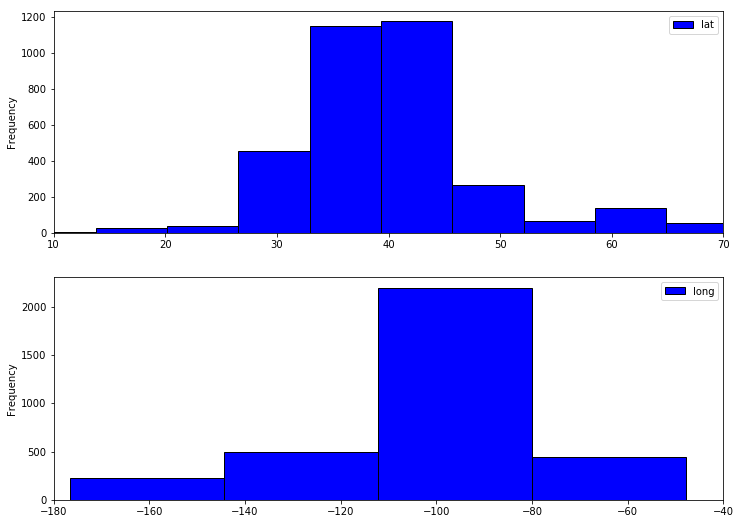

In [43]:
airports = pd.read_csv('airports.csv')
axes=make_hists(airports, 'lat', 'long')

In [42]:
airports = pd.read_csv('airports.csv')

axes = make_hists(airports, 'lat', 'long')

lathist = axes[0]
longhist = axes[1]
# is the data in the plot right? are the axis limits right?
assert_almost_equal(lathist.dataLim, [[7.367222, 0.0], [71.2854475, 1176.0]])
assert_almost_equal(longhist.dataLim, [[-176.6460306, 0.0], [145.621384, 2195.0]])

# height and width tests
assert_equal(lathist.get_figure().get_figwidth(), 12.0)
assert_equal(lathist.get_figure().get_figheight(), 9.0)

# plt.savefig('p1_example.png')

plt.close()

### Problem 2

In [59]:
def make_scatter(df, col1, col2):
    '''
    Makes a scatterplot for columns of a dataframe, namely the lat and 
    long columns of the airports data
    
    Params
    -------
    df: the dataframe to plot
    col1: the column to plot on the y axis
    col2: the column to plot on the x axis
    
    Returns
    -------
    A matplotlib.axes._subplots.AxesSubplot object
    
    '''

    f, ax = plt.subplots(figsize=(12.0, 6.0))
    ax.scatter(df[col2], df[col1],edgecolor='black',color='blue')
    ax.set_title('Latitudes and Longitudes of US Airports')
    ax.set_xlabel('long')
    ax.set_ylabel('lat')
    ax.set_xlim(-200, 200)
    ax.set_ylim(0, 80)
    return ax

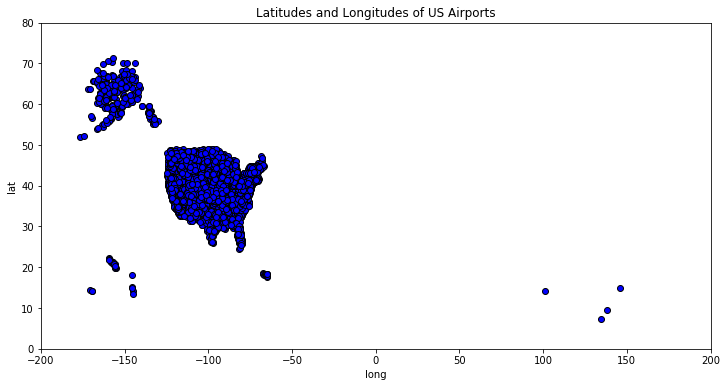

In [60]:
p2_ax = make_scatter(airports, 'lat', 'long')

In [61]:
assert_almost_equal(p2_ax.dataLim, [[-176.6490360677117, 7.361211064576615], [145.62438946771172, 71.29145843542341]], decimal=0)

# height and width tests
assert_equal(p2_ax.get_figure().get_figwidth(), 12.0)
assert_equal(p2_ax.get_figure().get_figheight(), 6.0)

# plt.savefig('p2_example.png')

plt.close()

### Problem 3

In [69]:
def five_number_summary(series):
    '''
    Produces a five-number summary for a Pandas Series.
    
    Params
    -------
    series: a Pandas Series
    
    Returns
    -------
    A 5-tuple consisting of the min, 25Q, median, 75Q, and max, 
    in that order
    
    '''
    
    a=series.min()
    b=series.quantile(q=0.25)
    c=series.median()
    d=series.quantile(q=0.75)
    e=series.max()
    return a,b,c,d,e

In [71]:
fns_lat = five_number_summary(airports.lat)
fns_lon = five_number_summary(airports.long)

assert_equal(type(fns_lat), tuple)
assert_equal(type(fns_lon), tuple)
assert_equal(len(fns_lat), 5)
assert_equal(len(fns_lon), 5)

assert_almost_equal(fns_lat,
                    [7.3672219999999999, 34.688427154999999,
                      39.434449305000001, 43.372612357500003,
                      71.285447500000004], decimal=2)

assert_almost_equal(fns_lon,
                    [-176.64603059999999, -108.76112075,
                     -93.599425414999999, -84.137518542500004,
                     145.62138400000001], decimal=2)

### Problem 4

In [72]:
df = pd.read_csv('airports.csv')
df = df.sample(1000, random_state = 0)

In [115]:
def bootstrap_sample(series):
    '''
    Produces a bootstrap sample of a Pandas Series
    
    Params
    -------
    series: a Pandas Series
    random_state: to be passed to the sample method
    
    Returns
    -------
    A Series that is a sample with replacement of the 
    original series (of the same length)
    
    '''
    
    result=series.sample(n=len(series),replace=True)
    return result

In [116]:
# are you returning a series
assert_equal(type(bootstrap_sample(df.lat)), pd.Series)
assert_equal(type(bootstrap_sample(df.long)), pd.Series)

# is n correct? is the shape right?
assert_equal(bootstrap_sample(df.lat).shape, (1000,))
assert_equal(bootstrap_sample(df.long).shape, (1000,))

# are you sampling with replacement
assert(len(bootstrap_sample(df.lat).unique()) < len(df.lat.unique()))
assert(len(bootstrap_sample(df.long).unique()) < len(df.long.unique()))

# are all the items of the sample contained in the original data?
assert(set(bootstrap_sample(df.lat).unique()).issubset(set(df.lat)))
assert(set(bootstrap_sample(df.long).unique()).issubset(set(df.long)))

### Problem 5

In [135]:
def bootstrap_mean(series, num_times = 1000):
    '''
    Produces a sampling distribution of the sample mean of a 
    Pandas Series
    
    Params
    -------
    series: a Pandas Series
    num_times: the number of iterations to run
    
    Returns
    -------
    A Series that is of length num_times with each entry being the mean
    of a bootstrap sample of series
    '''
    
    result=[]
    for i in range(1,num_times+1):
        s=bootstrap_sample(series).mean()
        result.append(s)
    return pd.Series(result)

In [136]:
sampling_dist_of_mean_lat = bootstrap_mean(df.lat)
sampling_dist_of_mean_long = bootstrap_mean(df.long)

# are you returning a series
assert_equal(type(sampling_dist_of_mean_lat), pd.Series)
assert_equal(type(sampling_dist_of_mean_long), pd.Series)

# is n correct? is the shape right?
assert_equal(sampling_dist_of_mean_lat.shape, (1000,))
assert_equal(sampling_dist_of_mean_long.shape, (1000,))

assert_almost_equal(sampling_dist_of_mean_lat.describe().values[[0,1,2]], 
                    [1000, 40.103375, 0.271926], decimal=0)

assert_almost_equal(sampling_dist_of_mean_long.describe().values[[0,1,2]], 
                    [1000, -99.951699, 0.698565], decimal=0)

### Plotting

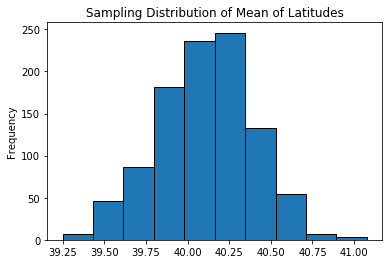

In [141]:
sampling_dist_of_mean_lat.plot(kind='hist', edgecolor='black',
                               title='Sampling Distribution of Mean of Latitudes')
plt.show()

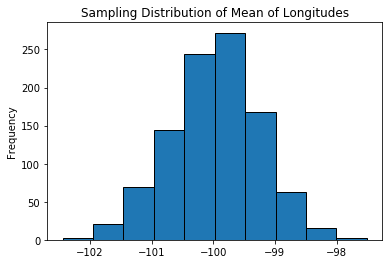

In [140]:
sampling_dist_of_mean_long.plot(kind='hist', edgecolor='black',
                                title='Sampling Distribution of Mean of Longitudes')
plt.show()

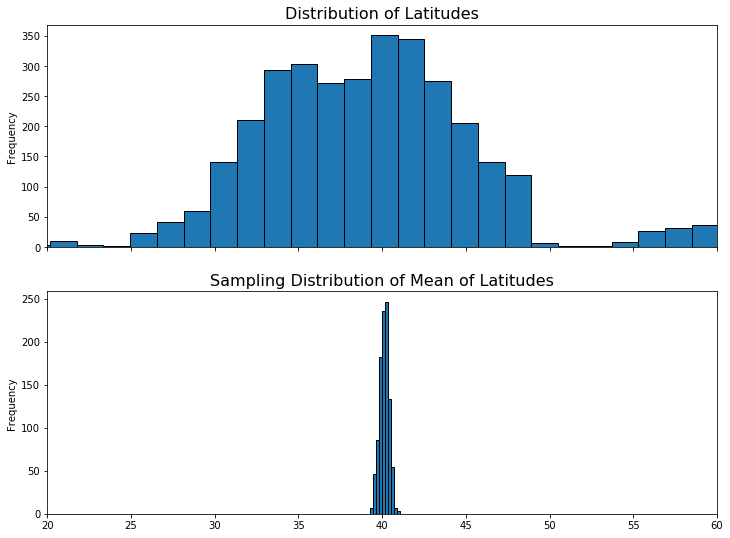

In [144]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12,9))
airports.lat.plot(kind='hist', edgecolor='black',ax=ax1, xlim=(20,60), bins=40)
sampling_dist_of_mean_lat.plot(kind='hist', edgecolor='black',ax =ax2)
ax1.set_title('Distribution of Latitudes', size=16)
ax2.set_title('Sampling Distribution of Mean of Latitudes', size=16)
plt.show()


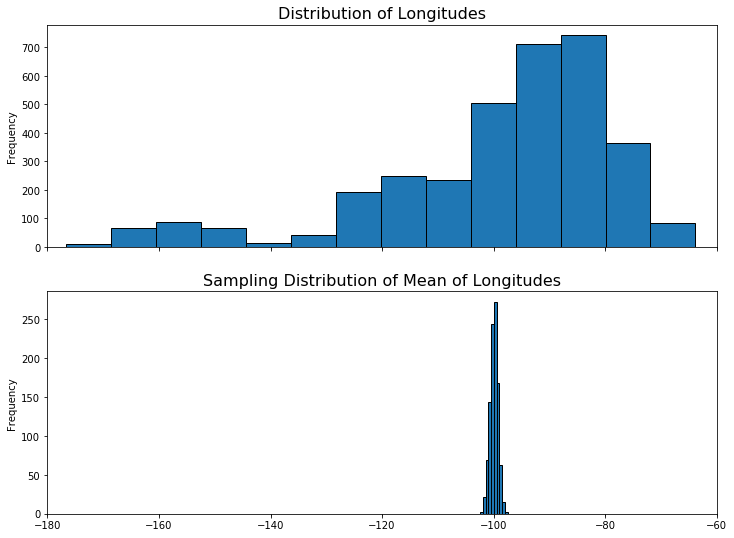

In [145]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12,9))
airports.long.plot(kind='hist', edgecolor='black', ax=ax1, xlim=(-180, -60), bins=40)
sampling_dist_of_mean_long.plot(kind='hist', edgecolor='black', ax =ax2)
ax1.set_title('Distribution of Longitudes', size=16)
ax2.set_title('Sampling Distribution of Mean of Longitudes', size=16)
plt.show()